<a href="https://colab.research.google.com/github/Risha-art/MAT-422/blob/main/HW_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1.4 Principal Component Analysis**##

Principal component analysis is an unsupervised learning algorithm technique frequently used for dimensionality reduction in machine learning. In other words, it is used to simplify a large dataset by reducing the dataset's number of dimensions, while retaining as much information as possible, i.e. significant patterns and trends. Its foundational principles can be explained using singular value decomposition.

####**1.4.1. Singular Value Decomposition**####

The singular value decomposition of a matrix $A$ is the factorization of $A$ into the product of 3 matrices $A = UDV^T$, where the columns of $U$ and $V$ are orthonormal and the matrix $D$ is diagonal with positive real entries.

It can be applied to a matrix and it can also be used to simplify the resolution/size/coloring of an image. Both cases demonstrate a "dimensional reduction" to isolate the key features and patterns of the data set.

The first example will illustrate calculating the SVD of matrix $A$ and the second example will apply SVD to an image.






1.4.1. Worked Example on Matrix A

Reference: https://www.youtube.com/watch?v=uOzMM13iElw

1. Determine $V$ and then $V^T$
2. Determine singular values, $σ_i$ and then $Σ$.
3. Determine $U$ using $A = UΣV^T$ -> $AV = UΣ$ since $V$ is orthogonal to $V^T$, we known $VV^T = I$.

In [ ]:
import math
import numpy as np
#establish matrix A
print("Let A be an m x n matrix. Then A = UΣV^T is the single value decomposition of A.")
A = np.array([ [1,-1,3], [3,1,1]])
print("Set matrix A = ", A)

#Since V is an n x n orthogonal matrix whose columns are unit eigenvectors of (A^T)*A, calculate A^T * A.
A_transpose = A.transpose()
res = A_transpose @ A
print("(A^T)*A = ", res)
#calculate det(A-lambda*I) = 0, => lambda_1 = 16, lambda_2 = 6, lambda_3 = 0
V1 = np.array([1/math.sqrt(2),-1/math.sqrt(3),-1/math.sqrt(6)])
V2 = np.array([0,-1/math.sqrt(3),2/math.sqrt(6)])
V3 = np.array([1/math.sqrt(2),1/math.sqrt(3),1/math.sqrt(6)])
V = np.array([V1,V2,V3])
print("Let V1, V2, and V3 equal to the rows of V: ", V)
V_transpose = V.transpose()

#Sigma is the m x n matrix with singular values of A on the main diagonal and all other entries are zero
#singular values of A are square roots of positive eigenvalues of A^TA or AA^T, which have the same eigenvalues
sigma = ([4,0,0],[0,math.sqrt(6),0])
print("Sigma equals", sigma)

#Now lets find U, by solving AV  = USigma => U = AV/Sigma
print("The first column of matrix V = ",V[:,0])
A2 = A/4
u1 = A2 @ V[:,0]
print("The first row of U = A/Sigma1 * V1 ",u1)

print("The second column of matrix V = ", V[:,1])
A3 = A/math.sqrt(6)
u2 = A3 @ V[:,1]
print("The second column of U = A/Sigma2 * V2 = ",u2)
U = np.array([u1,u2])
print("Thus the matrix U = ",U)
print("Now we know A = UΣV^T.")


Let A be an m x n matrix. Then A = UΣV^T is the single value decomposition of A.
Set matrix A =  [[ 1 -1  3]
 [ 3  1  1]]
(A^T)*A =  [[10  2  6]
 [ 2  2 -2]
 [ 6 -2 10]]
Let V1, V2, and V3 equal to the rows of V:  [[ 0.70710678 -0.57735027 -0.40824829]
 [ 0.         -0.57735027  0.81649658]
 [ 0.70710678  0.57735027  0.40824829]]
Sigma equals ([4, 0, 0], [0, 2.449489742783178, 0])
The first column of matrix V =  [0.70710678 0.         0.70710678]
The first row of U = A/Sigma1 * V1  [0.70710678 0.70710678]
The second column of matrix V =  [-0.57735027 -0.57735027  0.57735027]
The second column of U = A/Sigma2 * V2 =  [ 0.70710678 -0.70710678]
Thus the matrix U =  [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Now we know A = UΣV^T.


1.4.2. Worked Example applying SVD to images
Reference: https://www.geeksforgeeks.org/image-reconstruction-using-singular-value-decomposition-svd-in-python/

We can reconstruct SVD of an image using lingalg.svd() method of the NumPy Module.

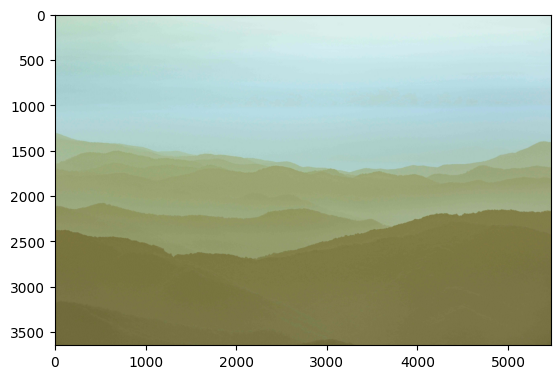

u.shape:(3648, 3648),s.shape:(3648,),v.shape:(3648, 5472)
The above output shape indicates that there are 3648 linearly independent eigenvectors in this image.


In [ ]:
# import module
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

# assign and open image
url = 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210401173418/Webp-compressed.jpg'
response = requests.get(url, stream=True)

with open('image.png', 'wb') as f:
	f.write(response.content)

img = cv2.imread('image.png')
imgplot = plt.imshow(img)
plt.show()

# Converting the image into gray scale for faster
# computation.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)

# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')
print("The above output shape indicates that there are 3648 linearly independent eigenvectors in this image.")

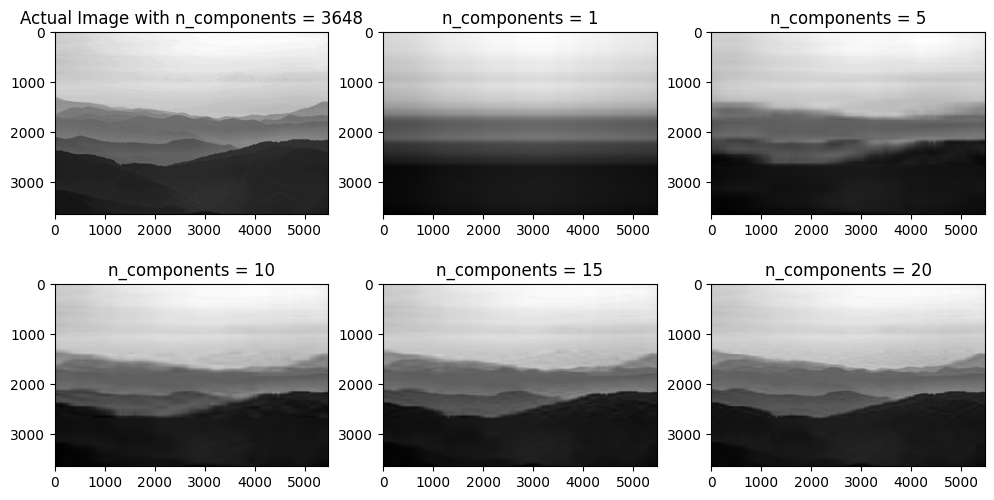

In [ ]:
# plot images with different number of components
comps = [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(12, 6))

for i in range(len(comps)):
	low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]

	if(i == 0):
		plt.subplot(2, 3, i+1),
		plt.imshow(low_rank, cmap='gray'),
		plt.title(f'Actual Image with n_components = {comps[i]}')

	else:
		plt.subplot(2, 3, i+1),
		plt.imshow(low_rank, cmap='gray'),
		plt.title(f'n_components = {comps[i]}')

Though the 1st eigenvector contains 99.77% of information reconstructing an image solely from it does not give a clear picture.
Using the top 15 vectors for the image reconstruction gives a good enough approximation. Also out of 3648 vectors which is a massive decrease in computation and also it compresses the image.

####**1.4.2. Low-Rank Matrix Approximation**####

Low-rank approximation is a technique that harnesses SVD to create a simplified version of a matrix while preserving its most critical information. Its achieved by retaining only the most significant singular values and their corresponding vectors.

The Eckart-Young-Mirsky Theorem says a SVD can be used to find the closest low-rank matrix to a given matrix. The theorem is based on the idea that any matrix can be broken down into a sum of rank-1 component matrices


####**1.4.3. Principal Component Analysis**####

Principal component analysis (PCA) is a linear dimensionality reduction technique that can extract information from a high-dimensional space by projecting it into a lower-dimensional sub-space. If you are familiar with the language of linear algebra, you could also say that principal component analysis is finding the eigenvectors of the covariance matrix to identify the directions of maximum variance in the data.

One important thing to note about PCA is that it is an unsupervised dimensionality reduction technique, so you can cluster similar data points based on the correlation between them without any supervision (or labels).

PCA can be applied to both data visualization and accelerating a machine learning algorithm.

Applying this technique to a set of Breast Cancer data, we can see how the data set can be visualized using PCA.

The breast cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two characters are: malignant and benign. The malignant class has 212 samples, whereas the benign class has 357 samples. There are 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

Reference: https://www.datacamp.com/tutorial/principal-component-analysis-in-python

(569, 31)
Explained variability per principal component: [0.44272026 0.18971182]


<ipython-input-39-8c02a9e1c0a4>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign',inplace=True)


<Figure size 640x480 with 0 Axes>

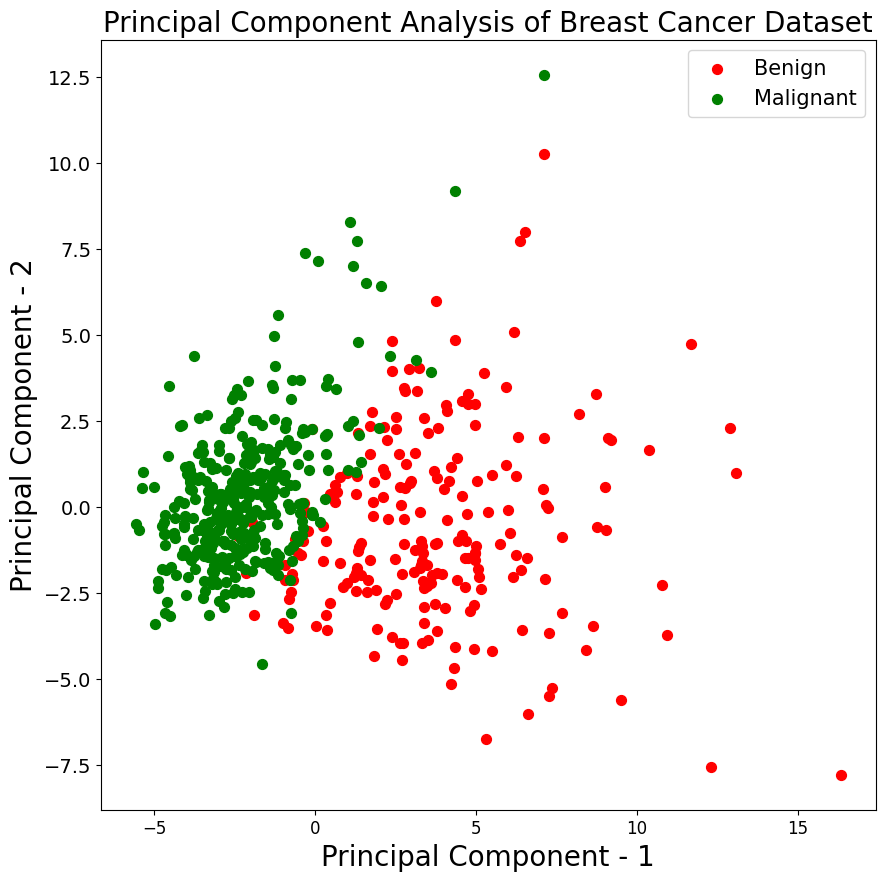

In [39]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

breast_data = breast.data

breast_data.shape

breast_labels = breast.target

breast_labels.shape

import numpy as np

labels = np.reshape(breast_labels,(569,1))
#reshaping the labels, you will concatenate the data and labels along the second axis
#which means the final shape of the array will be 569 x 31
final_breast_data = np.concatenate([breast_data,labels],axis=1)
print(final_breast_data.shape) #should be (569,31)

#import pandas to create the DataFrame of the final data to represent the data in a tabular fashion
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features
features_labels = np.append(features,'label')
#embed column names to the breast_dataset dataframe
breast_dataset.columns = features_labels
#sanity check: print the first few rows of the dataframe
breast_dataset.head()
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()
#While applying StandardScaler, each feature of your data should be normally distributed
#such that it will scale the distribution to a mean of zero and a standard deviation of one.
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
np.mean(x),np.std(x)
#convert normalized features into tabular format with help of DataFrame
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
#the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components.
#use the sklearn library to import the PCA module, and in the PCA method,
#pass the number of components (n_components=2) and finally call fit_transform on the aggregate data.
#several components represent lower dimension to project your higher dimension data.
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()
print('Explained variability per principal component: {}'.format(pca_breast.explained_variance_ratio_))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})




From the above graph, it can be observed that the two classes, benign and malignant, when projected to a 2D space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.